# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
telecom_users_df = pd.read_csv('telecom_users.csv')

In [3]:
#Смена названия некоторых столбцов для единообразия.
telecom_users_df.rename(columns={'gender': 'Gender', 'tenure': 'Tenure', 'customerID': 'CustomerID'}, inplace=True)

#Удаляем лишнюю колонку.
telecom_users_df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
telecom_users_df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [5]:
#Количество значений в столбцах с бинарными значениями.
columns = [
    'Gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Churn']
for column in columns:
    print(column)
    if column == 'SeniorCitizen':
        print(telecom_users_df["SeniorCitizen"].replace({0: 'No', 1: 'Yes'}).value_counts())
    else:
        print(telecom_users_df[column].value_counts())
    print('\n')

Gender
Male      3050
Female    2936
Name: Gender, dtype: int64


SeniorCitizen
No     5020
Yes     966
Name: SeniorCitizen, dtype: int64


Partner
No     3082
Yes    2904
Name: Partner, dtype: int64


Dependents
No     4195
Yes    1791
Name: Dependents, dtype: int64


PhoneService
Yes    5396
No      590
Name: PhoneService, dtype: int64


MultipleLines
No                  2848
Yes                 2548
No phone service     590
Name: MultipleLines, dtype: int64


InternetService
Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64


OnlineSecurity
No                     2982
Yes                    1713
No internet service    1291
Name: OnlineSecurity, dtype: int64


OnlineBackup
No                     2605
Yes                    2090
No internet service    1291
Name: OnlineBackup, dtype: int64


DeviceProtection
No                     2640
Yes                    2055
No internet service    1291
Name: DeviceProtection, dtype: int64


TechSupport

In [6]:
#Приводим значения в колонках к числовым.
telecom_users_df["Gender"].replace({'Male': 0, 'Female': 1}, inplace=True)
telecom_users_df["Partner"].replace({'No': 0, 'Yes': 1}, inplace=True)
telecom_users_df["Dependents"].replace({'No': 0, 'Yes': 1}, inplace=True)
telecom_users_df["PhoneService"].replace({'No': 0, 'Yes': 1}, inplace=True)
telecom_users_df["MultipleLines"].replace({'No': 0, 'Yes': 1, 'No phone service': 2}, inplace=True)
telecom_users_df["InternetService"].replace({'No': 0, 'Fiber optic': 1, 'DSL': 2}, inplace=True)
telecom_users_df["OnlineSecurity"].replace({'No': 0, 'Yes': 1, 'No internet service': 2}, inplace=True)
telecom_users_df["OnlineBackup"].replace({'No': 0, 'Yes': 1, 'No internet service': 2}, inplace=True)
telecom_users_df["DeviceProtection"].replace({'No': 0, 'Yes': 1, 'No internet service': 2}, inplace=True)
telecom_users_df["TechSupport"].replace({'No': 0, 'Yes': 1, 'No internet service': 2}, inplace=True)
telecom_users_df["StreamingTV"].replace({'No': 0, 'Yes': 1, 'No internet service': 2}, inplace=True)
telecom_users_df["StreamingMovies"].replace({'No': 0, 'Yes': 1, 'No internet service': 2}, inplace=True)
telecom_users_df["Contract"].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2}, inplace=True)
telecom_users_df["PaperlessBilling"].replace({'No': 0, 'Yes': 1}, inplace=True)
telecom_users_df["PaymentMethod"].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}, inplace=True)
telecom_users_df["Churn"].replace({'No': 0, 'Yes': 1}, inplace=True)

#Правим поле TotalCharges, где нет значения. Приводим его к типу float.
telecom_users_df['TotalCharges'] = telecom_users_df['TotalCharges'].replace({' ': 0}).astype(float)

In [7]:
#Базовые статистики столбца MonthlyCharges.
telecom_users_df['MonthlyCharges'].describe()

count    5986.000000
mean       64.802213
std        30.114702
min        18.250000
25%        35.650000
50%        70.400000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

Выбросов в данном столбце нет.

In [8]:
#Базовые статистики столбца TotalCharges.
telecom_users_df['TotalCharges'].describe()

count    5986.000000
mean     2294.221559
std      2274.164124
min         0.000000
25%       401.587500
50%      1408.575000
75%      3841.500000
max      8684.800000
Name: TotalCharges, dtype: float64

In [9]:
#Базовые статистики столбца Tenure.
telecom_users_df['Tenure'].describe()

count    5986.000000
mean       32.468760
std        24.516391
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: Tenure, dtype: float64

Выбросов в данном столбце нет.

# 2. Исследование зависимостей и формулирование гипотез

NameError: name 'sns' is not defined

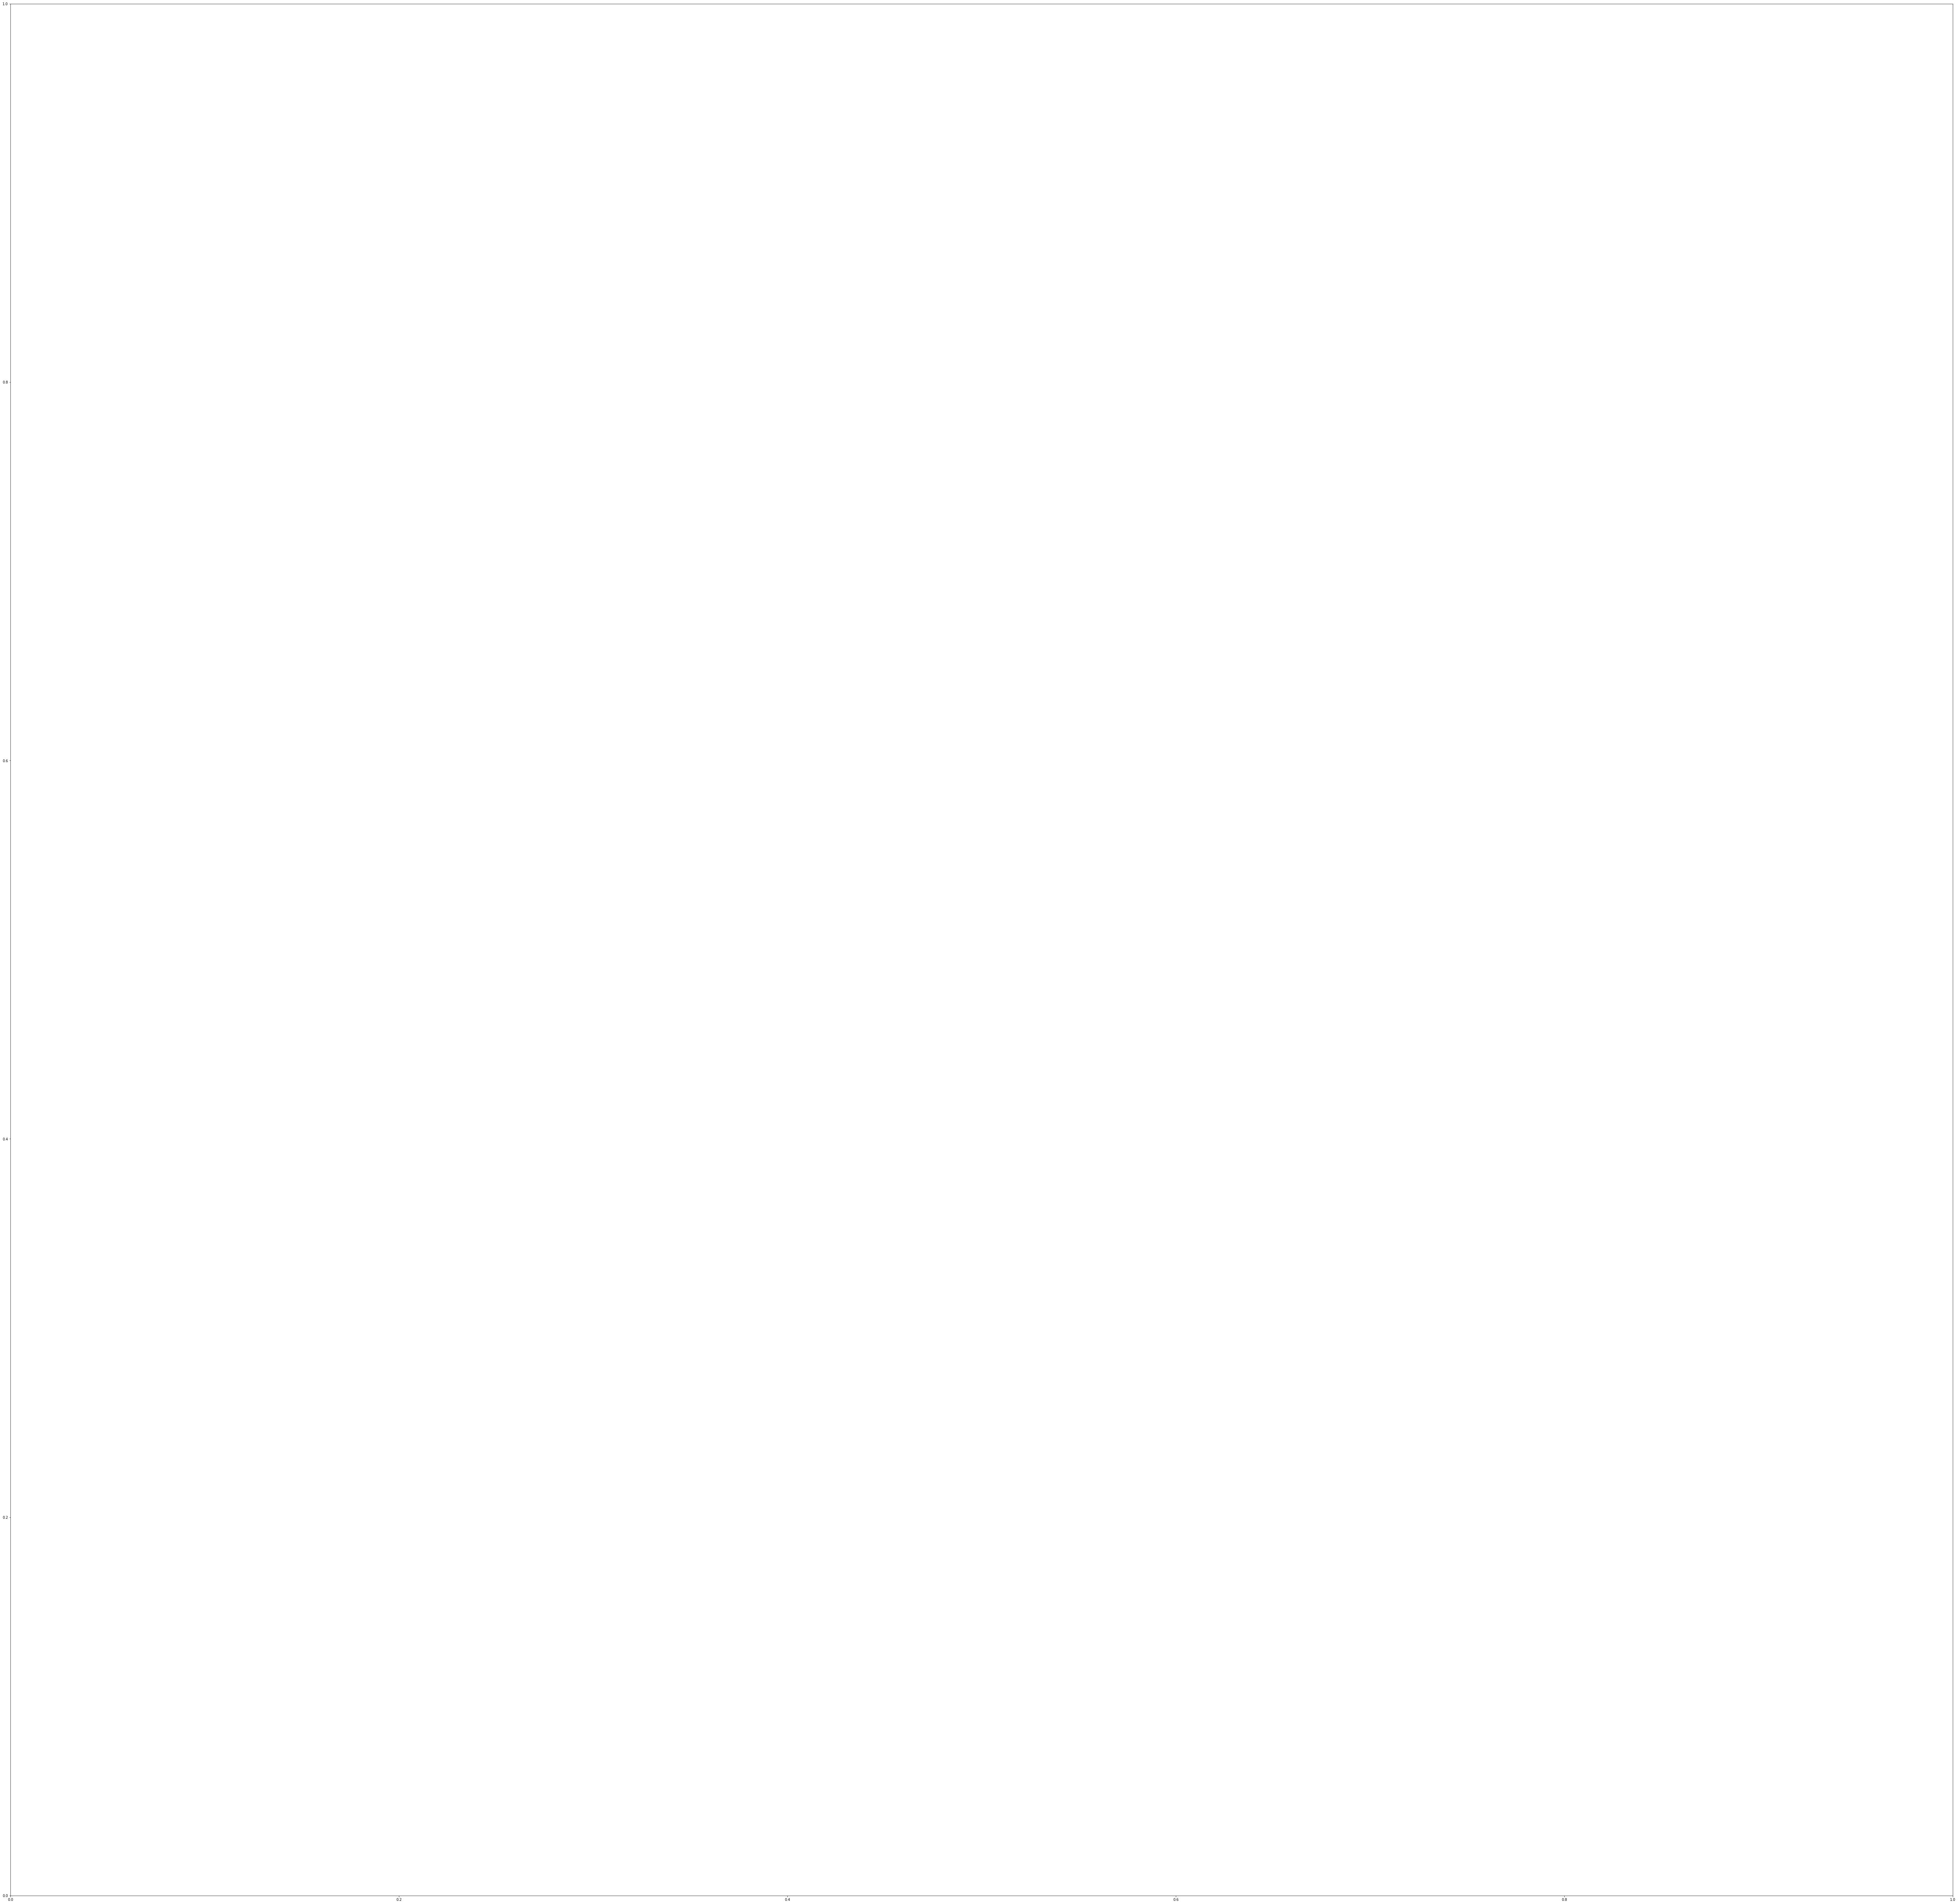

In [13]:
df_corr = telecom_users_df.corr()
fig, ax = plt.subplots(figsize=(100,100))  
ax = sns.heatmap(df_corr, cmap='RdYlGn', annot=True, ax=ax, annot_kws={"size": 40})
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) 
plt.xticks(fontsize=70, rotation=90)
plt.yticks(fontsize=70, rotation=0)
plt.show()

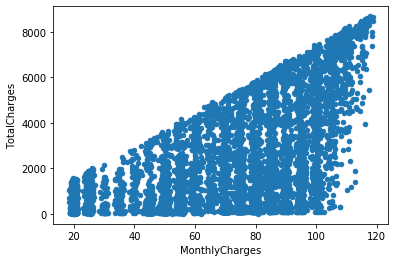

In [10]:
telecom_users_df.plot.scatter(x='MonthlyCharges', y='TotalCharges')

# 3. Построение моделей для прогнозирования оттока

In [11]:
### YOUR CODE HERE ###




# 4. Сравнение качества моделей 

In [12]:
### YOUR CODE HERE ###


